# Chapter 10: Normal Distribution and Parametric Tests

<div class="alert alert-info">Learning Goals:</div>

1. Understand the properties and characteristics of the normal distribution.
2. Learn about parametric tests and their applications.
3. Explore the one-sample t-test, paired t-test, and two-sample t-test.
4. Understand the assumptions underlying parametric tests and how to assess them.
5. Utilize Python code examples to perform parametric tests and assess assumptions.

## Introduction
The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution that is symmetric and bell-shaped. It is characterized by its mean and standard deviation.

### Standard Normal Distribution
The standard normal distribution has a mean of 0 and a standard deviation of 1. It serves as a reference distribution for statistical calculations.

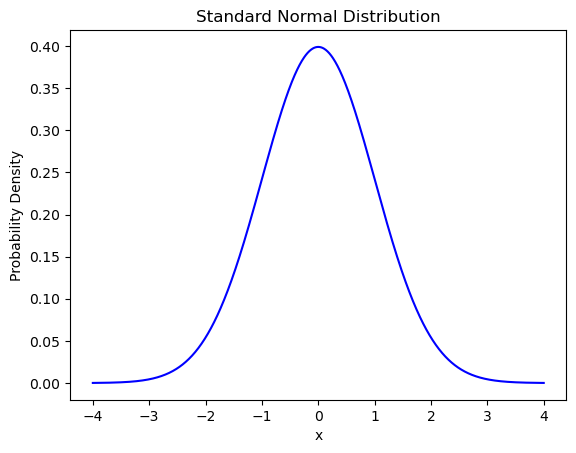

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for x-axis
x = np.linspace(-4, 4, 1000)

# Calculate corresponding y-values from the standard normal distribution
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Plot the standard normal distribution
plt.plot(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.grid(False)
plt.show()

### Video
<iframe width="462" height="260" src="https://www.youtube.com/embed/H_d6Mep3g_8" title="The normal distribution" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Utilities of the normal distribution

The normal distribution is extremely valuable in statistics due to its universal applicability, enabled in part by the **Central Limit Theorem**, which states that sample means tend to follow a normal distribution, regardless of the original population distribution. This is critical to statistical methods like hypothesis testing and confidence intervals. The distribution's simplicity, characterized by the mean and standard deviation, facilitates mathematical analysis and description of real-world phenomena. Serving as an approximation for diverse distributions and providing standardized scores for comparison, the normal distribution simplifies calculations and supports inference about population parameters. Its prevalence in fields such as process control, quality assurance, and population studies further underscores its indispensability, making it a foundational concept for statistical analysis.

### Video
<iframe width="462" height="260" src="https://www.youtube.com/embed/48xR4zT-Eqc" title="Central limit theorem" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Parametric Tests and their Applications
Parametric tests are statistical tests that make assumptions about the underlying distribution of the data. These tests are based on specific parameters, such as means or variances, and are useful for comparing groups or testing hypotheses.

### Applications of Parametric Tests
Parametric tests are commonly used in various scenarios, including:
- Comparing a sample mean to a known or hypothesized value.
- Comparing two related samples.
- Comparing two independent samples.

Parametric tests are based on the normal distribution which are based on population means ($\mu$) and standard deviations ($\sigma$). In real-life studies, however, we rarely know the population standard deviation.
Therefore, we need to estimate it using the standard error of the mean (SE). This
then changes our normal sampling distribution to a **t-distribution**.

$t = \frac{\bar{x} - \mu_0}{{SE}_{\bar{y}}}$


The t distribution incorporates sampling error, and therefore is wider than 
a standard normal. Because we need to estimate $\sigma$ before calculating t, a 
t-distribution will have a degrees of freedom of `n - 1`. The one below is a t distribution with df = 5.

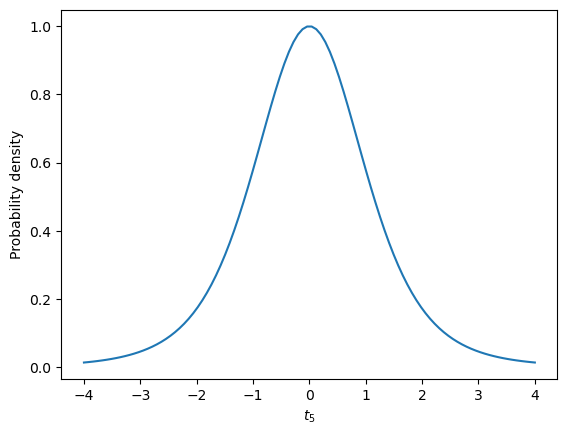

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def dt(x, df):
    return (1 + x**2 / df)**(-((df + 1) / 2))

x = np.linspace(-4, 4, 100)
y = dt(x, df=5)

plt.plot(x, y)
plt.xlabel('$t_5$')
plt.ylabel('Probability density')
plt.show()

### Video
<iframe width="462" height="260" src="https://www.youtube.com/embed/dHfKVL_Z9ZA" title="t-distribution" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## One-Sample t-test
The one-sample t-test is used to determine if the mean of a single sample significantly differs from a hypothesized value.

$H_0 = \mu_1 = \mu_0$

$H_A = \mu_1 \neq \mu_0$

$t = \frac{\bar{y} - \mu_0}{SE_{\bar{y}}}$

### Assumptions for the One-Sample t-test
- The data are normally distributed.
- The observations are independent.
- The population standard deviation is unknown.

### Video
<iframe width="462" height="260" src="https://www.youtube.com/embed/E9Y9wJeMSxk" title="One sample t-test" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Performing the One-Sample t-test in Python

In [13]:
from scipy.stats import ttest_1samp

# Example data
data = [4.8, 5.2, 5.1, 4.9, 5.3, 5.0, 5.2, 5.1]

# Hypothesized mean
hypothesized_mean = 5.0

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(data, hypothesized_mean)
print("One-Sample t-test Results:")
print("t-statistic:", round(t_statistic, 2))
print("p-value:", round(p_value, 2))

One-Sample t-test Results:
t-statistic: 1.27
p-value: 0.24


## Paired t-test
The paired t-test is used to compare the means of two related samples, typically collected under different conditions or time points.

$H_0 = \mu_d = 0$

$H_A = \mu_d \neq 0$

$t = \frac{\bar{d} - \mu_{d0}}{SE_{\bar{d}}}$

### Assumptions for the Paired t-test
- The differences between paired observations are normally distributed.
- The differences are independent.
- The population standard deviation of the differences is unknown.

### Performing the Paired t-test in Python

In [14]:
from scipy.stats import ttest_rel

# Example data
before = [18, 19, 20, 17, 16]
after = [15, 17, 19, 16, 16]

# Perform paired t-test
t_statistic, p_value = ttest_rel(before, after)
print("Paired t-test Results:")
print("t-statistic:", round(t_statistic,2 ))
print("p-value:", round(p_value, 2))

Paired t-test Results:
t-statistic: 2.75
p-value: 0.05


## Two-Sample t-test
The two-sample t-test is used to compare the means of two independent samples.

$H_0 = \mu_1 = \mu_2$

$H_A = \mu_1 \neq \mu_2$

$t = \frac{\bar{y}_1 - \bar{y}_2}{SE_{\bar{y}_1 - \bar{y}_2}}$

where

$SE_{\bar{y}_1 - \bar{y}_2} = \sqrt{s^{2}_{p}(\frac{1}{n_1} + \frac{1}{n_2})}$

where

$s^{2}_{p} = \frac{(n_1 - 1)s^{2}_{1} + (n_2 - 1)s^{2}_{2}}{n_1 + n_2 - 2}$

### Assumptions for the Two-Sample t-test
- The data in each group are normally distributed.
- The observations are independent.
- The population standard deviations of the two groups are equal.

### Performing the Two-Sample t-test in Python

In [15]:
from scipy.stats import ttest_ind

# Example data
group1 = [15, 18, 20, 22, 17]
group2 = [12, 14, 16, 15, 18]

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(group1, group2)
print("Two-Sample t-test Results:")
print("t-statistic:", round(t_statistic, 2))
print("p-value:", round(p_value, 2))

Two-Sample t-test Results:
t-statistic: 2.17
p-value: 0.06


## Assessing Assumptions

### Normality Assumption
- Visual Assessment: Plotting histograms ("Eyeball test").
- Statistical Tests: Shapiro-Wilk test. (Looking to fail to reject $H_0$)

**Note**: Parametric test are typically robust to violations of this assumption, meaning the data does not need to be perfectly normal.

### Eyeball test example

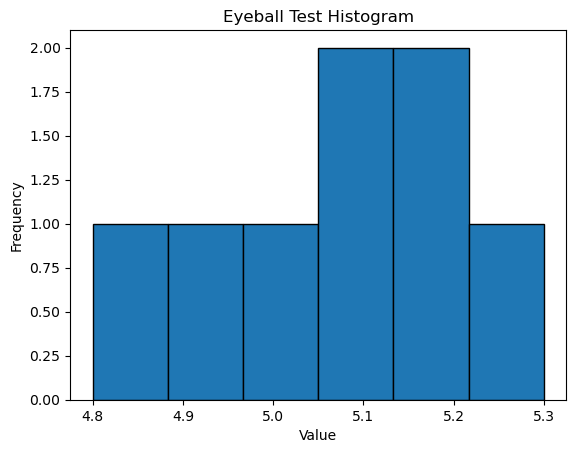

In [16]:
import matplotlib.pyplot as plt

# Example data (replace with your own observed data)
data = [4.8, 5.2, 5.1, 4.9, 5.3, 5.0, 5.2, 5.1]

# Plot histogram
plt.hist(data, bins=6, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Eyeball Test Histogram')
plt.grid(False)
plt.show()


### Shapiro-Wilk example

In [17]:
from scipy.stats import shapiro

# Example data (replace with your own data)
data = [4.8, 5.2, 5.1, 4.9, 5.3, 5.0, 5.2, 5.1]

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data)
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", round(statistic, 2))
print("p-value:", round(p_value, 2))

Shapiro-Wilk Test Results:
Test Statistic: 0.96
p-value: 0.8


### Independence Assumption
- Study Design: Ensure independence through random sampling or experimental design.

### Homogeneity of Variance Assumption
- Levene's test: Test for equality of variances. (Looking to reject $H_0$)

### Example using Levene's test

In [18]:
from scipy.stats import levene

# Example data (replace with your own data)
group1 = [15, 18, 20, 22, 17]
group2 = [12, 14, 16, 15, 18]

# Perform Levene's test
statistic, p_value = levene(group1, group2)
print("Levene's Test Results:")
print("Test Statistic:", round(statistic, 2))
print("p-value:", round(p_value, 2))

Levene's Test Results:
Test Statistic: 0.19
p-value: 0.68


## End of chapter questions

Using the Palmer Penguin data set, introduced in previous chapters:

1. Test whether the mean weight of Gentoo penguins is 400 g

2. Compare between the bill lengths of male Adelie and Chinstrap penguins

<div class="alert alert-info">Make sure to confirm that all assumptions of the test are met</div>

<div style="display:flex; justify-content:center;">
    <img src="../images/penguin2.jpg" alt="Image" width="400" height="300" style="margin-left: 10px;">
</div>